<h1>Breast Cancer Classification Dataset</h1>

<h3>Import Pandas, Numpy and Matplotlib</h3>

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

<h3>Load Dataset</h3>

In [471]:
df = pd.read_csv('breast-cancer.csv')

<h3>Show the First 5 Rows</h3>

In [472]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [473]:
# Replace M and B to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [474]:
# Get the correlations of the data to the diagnosis
correlations = df.corr()
important_features = correlations['diagnosis'].sort_values(ascending=False)

print('Highest Correlation to Diagnosis:')
print()
print(important_features)

Highest Correlation to Diagnosis:

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.

<h3>Separate Data into Data and Target Values</h3>

In [475]:
# Top 2 correlated features of dataset
X = df[['concave points_worst', 'perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean']]
X = X.to_numpy()

# Target Features
y = df[['diagnosis']]
y = y.to_numpy()

**Split Train and Test Datasets**

In [476]:
split_index = int(len(X) * 0.75)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

<h3>Define Sigmoid</h3>

In [477]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

<h3>Compute Cost</h3>

In [478]:
def compute_cost(X,y,w,b,lambda_=1):
    
    m,n = X.shape
    cost = 0
    
    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)

    cost = cost/m

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/2*m) * reg_cost

    total_cost = reg_cost + cost
    
    return total_cost

<h3>Set Inital Model Parameters and Run for Cost</h3>

In [479]:
# Size of examples and features
m,n = X.shape

# Set the initial parameters
w_initial = np.zeros(n)
b_initial = 0.

cost = compute_cost(X,y,w_initial,b_initial)
cost = float(cost)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


/tmp/ipykernel_3415/3434075480.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost = float(cost)


<h3>Test with Non-Zero</h3>

In [480]:
# Set the initial parameters
w_initial = np.array([0.01, 0.01,0.01,0.01,0.01,0.01,0.01,0.01])
b_initial = -8.

cost = compute_cost(X,y,w_initial,b_initial)
cost = float(cost)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): nan


/tmp/ipykernel_3415/1206475258.py:9: RuntimeWarning: divide by zero encountered in log
  cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
/tmp/ipykernel_3415/1206475258.py:9: RuntimeWarning: invalid value encountered in multiply
  cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
/tmp/ipykernel_3415/907747019.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost = float(cost)


<h3>Compute Gradient</h3>

In [481]:
def compute_gradient(X,y,w,b,lambda_=1):
    
    m,n = X.shape
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        err_i = sigmoid(np.dot(X[i],w)+b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)* w[j]

    return dj_db, dj_dw

<h3>Run with Zeros</h3>

In [482]:
w_initial = np.array([0,0,0,0,0,0,0,0])
b_initial = 0

dj_db, dj_dw = compute_gradient(X,y,w_initial,b_initial)
print('dj_db at initial w and b:', dj_db)
print('dj_dw at initial w and b:', dj_dw)

dj_db at initial w and b: [0.12741652]
dj_dw at initial w and b: [-1.05955000e-02  9.58356766e-01 -8.32404745e-03  2.60113357e-01
  3.00128295e+00 -8.96288225e+01  5.57283831e-01 -3.70823374e+01]


/tmp/ipykernel_3415/1533193656.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]


<h3>Run with Non-Zeros</h3>

In [483]:
w_test = np.array([0.01,-0.01,0.01,-0.01,0.01,-0.01,0.01,-0.01])
b_test = -24

dj_db, dj_dw = compute_gradient(X,y,w_test,b_test)
print('dj_db at initial w and b:', dj_db)
print('dj_dw at initial w and b:', dj_dw)

dj_db at initial w and b: [-0.37258348]
dj_dw at initial w and b: [-6.78810369e-02 -5.26722671e+01 -3.27660457e-02 -7.87449912e+00
 -4.29832162e+01 -5.29920404e+02 -6.50634446e+00 -3.64526907e+02]


/tmp/ipykernel_3415/1533193656.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]


<h3>Run Gradient Descent</h3>

In [484]:
def gradient_descent(X,y,w_in,b_in,compute_cost,compute_gradient, alpha,num_iters):

    m = len(X)

    J_hist = []
    w_hist = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X,y,w_in,b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 100000:
            cost = compute_cost(X,y,w_in,b_in)
            J_hist.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_hist.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}    ")
    return w_in, b_in, J_hist, w_hist

In [485]:
w_init = np.array([0,0.025,0.0,0.01,0.0,0.005,0,-0.005])
b_init = -2

iterations = 1000
alpha = 0.000001

w,b,J_hist,w_hist = gradient_descent(X_train,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)

/tmp/ipykernel_3415/1533193656.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]
/tmp/ipykernel_3415/3639203648.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}    ")


Iteration    0: Cost     0.80    
Iteration  100: Cost     0.61    
Iteration  200: Cost     0.59    
Iteration  300: Cost     0.58    
Iteration  400: Cost     0.57    
Iteration  500: Cost     0.56    
Iteration  600: Cost     0.55    
Iteration  700: Cost     0.55    
Iteration  800: Cost     0.54    
Iteration  900: Cost     0.53    
Iteration  999: Cost     0.52    


<h3>Final Model Parameters </h3>

In [486]:
print('Final model parameters of w (based on train data):', w)
print('Final model parameters of b (based on train data):', b)

Final model parameters of w (based on train data): [ 1.92169559e-06  2.00960511e-02  3.11835987e-06  9.18905615e-03
 -4.89795518e-03  7.59266225e-03 -8.07977479e-04 -9.53658361e-03]
Final model parameters of b (based on train data): [-2.00010413]


<h3>Plot of Cost and Weights Over Iterations</h3>

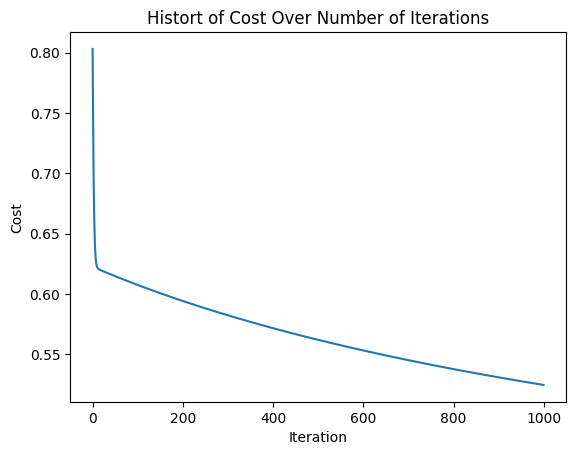

In [487]:
plt.plot(J_hist)
plt.title('Histort of Cost Over Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

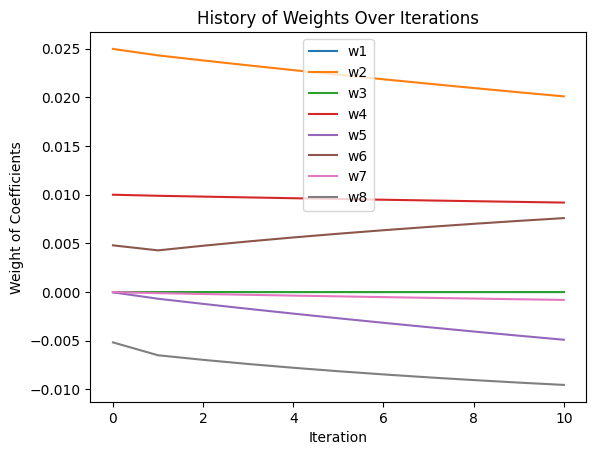

In [488]:
plt.plot(w_hist)
plt.title('History of Weights Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Weight of Coefficients')
plt.legend(['w1','w2','w3','w4','w5','w6','w7','w8'])

<h3>Test on Training Data</h3>

**Define Predict Function**

In [489]:
def predict(X,w,b):
    
    m,n = X.shape
    p = np.zeros(m)

    for i in range(m):
        curPred = sigmoid(np.dot(X[i],w)+b)
        if curPred >= 0.8:
            p[i] = 1
        else:
            p[i] = 0

    return p

<h3>Compare to Test Data</h3>

In [490]:
pred = predict(X_test,w,b)

print('Train Accuracy: %f'%(np.mean(pred==y_test) * 100))

Train Accuracy: 68.741748
